<a href="https://colab.research.google.com/github/leeju0/AI_study/blob/main/Fundus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip install opencv-python

In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/건양대학교/RFMiD_Training_Labels.csv")
df = df.iloc[:190,1:]
df

,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
186,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
187,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
188,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


!pip install natsort

In [ ]:
import natsort

In [ ]:
folder_dir = './content/drive/MyDrive/건양대학교/400'
folder_list = os.listdir(folder_dir)
sorted_file_list = natsort.natsorted(folder_list)

total_img = []
for dir in sorted_file_list:
    img_dir = folder_dir+dir
    img = cv2.imread(img_dir)
    resize_img = cv2.resize(img, (256, 256))
    total_img.append(resize_img)

total_img = np.array(total_img)
print(total_img.shape)

FileNotFoundError: [Errno 2] No such file or directory: './content/drive/MyDrive/건양대학교/400'

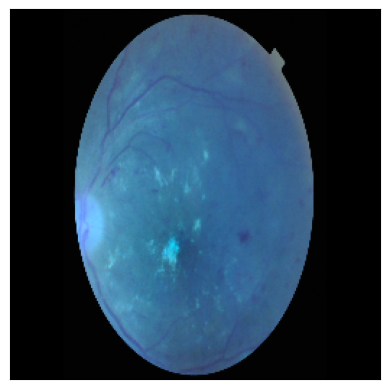

In [ ]:
plt.imshow(total_img[0])
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
print(df.shape)
print(total_img.shape)

(190, 46)
(190, 256, 256, 3)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(total_img, df,  test_size=0.1, shuffle=True)
print(X_train.shape)

(171, 256, 256, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train[0].shape

(256, 256, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(X_train[0].shape),activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 flatten (Flatten)           (None, 1016064)           0         
                                                                 
 dense (Dense)               (None, 128)               130056320 
                                                        

In [ ]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='mean_squared_error',
              optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, Y_train, validation_split=0.25,
                    epochs=30, batch_size=200,
                    verbose=0, callbacks=[early_stopping_callback,
                                          checkpointer])

# 테스트 정확도를 출력합니다.
#print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.02932, saving model to .\MNIST_CNN.hdf5


C:\Users\konyang\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss did not improve from 0.02932

Epoch 3: val_loss did not improve from 0.02932

Epoch 4: val_loss did not improve from 0.02932

Epoch 5: val_loss did not improve from 0.02932

Epoch 6: val_loss did not improve from 0.02932

Epoch 7: val_loss did not improve from 0.02932

Epoch 8: val_loss did not improve from 0.02932

Epoch 9: val_loss did not improve from 0.02932

Epoch 10: val_loss did not improve from 0.02932

Epoch 11: val_loss did not improve from 0.02932
